# Author- Tanmay Rathod

Data Science & Business Analytics Intern

Task 2 - Predicting using Unsupervised Learning

GRIP- The Spark Foundation

From Iris dataset predict the optimum number of clusters and represent it visually

# K- Means

K- Means algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 

# Importing the libraries

In [19]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
import sklearn.metrics as sm

# Loading Dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
pd.DataFrame(iris.target, columns = ['Target'])
print("Data imported sucessfully")

Data imported sucessfully


# Exploring Data

In [3]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
iris_df.shape

(150, 4)

In [5]:
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scatter Plot of Data

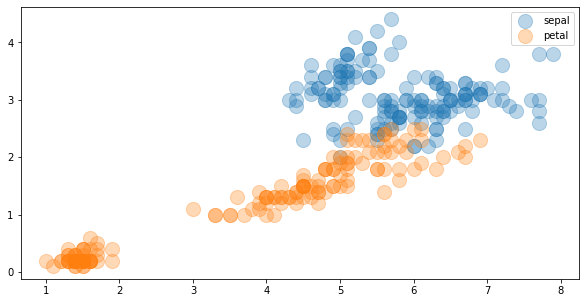

In [6]:
rng = np.random.RandomState(0)
plt.figure(figsize =(10,5))
x1 = 'Length(cm)'
y1 = 'Width(cm)'
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'], label = 'sepal',alpha = 0.3,s =200)
plt.scatter(iris_df['petal length (cm)'],iris_df['petal width (cm)'],label ='petal', alpha = 0.3, s = 200)
plt.legend()

# Finding the optimum number of clusters for k-means classification using Elbow method

In [7]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [8]:
from sklearn.cluster import KMeans
mylist = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    mylist.append(kmeans.inertia_)
    

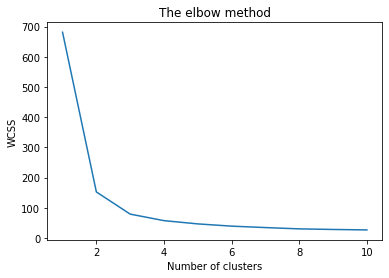

In [9]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), mylist)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Optimum number of clusters are 3

# Creating the kmeans classifier


In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [11]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Plotting Clusters

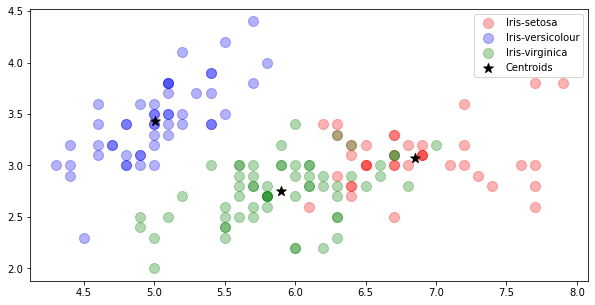

In [12]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa',alpha =0.3)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour',alpha = 0.3)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica',alpha = 0.3)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids', marker = '*')

plt.legend()

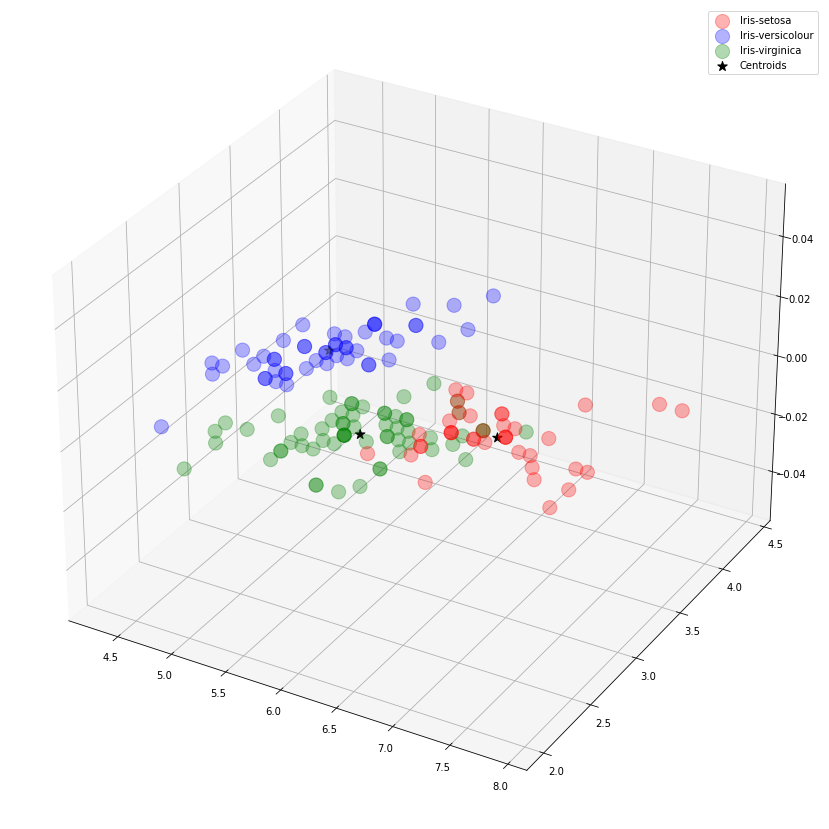

In [13]:
#3-D plot using matplotlib 
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,projection = '3d')
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s= 200, c ='red', label = 'Iris-setosa',alpha = 0.3)
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s= 200, c ='blue', label = 'Iris-versicolour',alpha = 0.3)
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s= 200, c ='green', label = 'Iris-virginica', alpha = 0.3)

#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'black', label = 'Centroids', marker= '*')
plt.legend()
plt.show()


# Labelling the predictions

In [14]:
y_kmeans = np.where(y_kmeans == 0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans == '1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans == '2', 'Iris-virginica',y_kmeans)

# Adding Predictions to Dataset/Dataframe

In [15]:
data_with_clusters = iris_df.copy()
data_with_clusters['Clusters'] = y_kmeans
data_with_clusters.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters
0,5.1,3.5,1.4,0.2,Iris-versicolour
1,4.9,3.0,1.4,0.2,Iris-versicolour
2,4.7,3.2,1.3,0.2,Iris-versicolour
3,4.6,3.1,1.5,0.2,Iris-versicolour
4,5.0,3.6,1.4,0.2,Iris-versicolour


# Barplot- Cluster Distribution

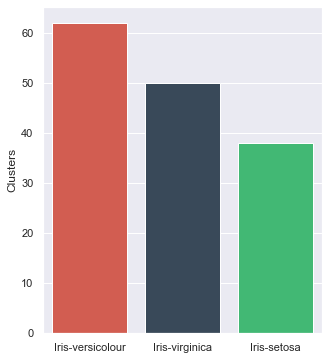

In [16]:
# Bar plot
sns.set(rc={'figure.figsize':(5,6)})
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Clusters"] .unique(),
            y = data_with_clusters["Clusters"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

There are around 63 Iris-versicolour, 50 Iris- virginica and 38 Iris-setosa

# Violin Plot

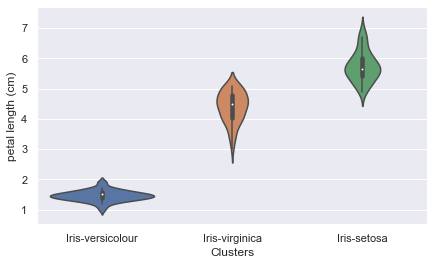

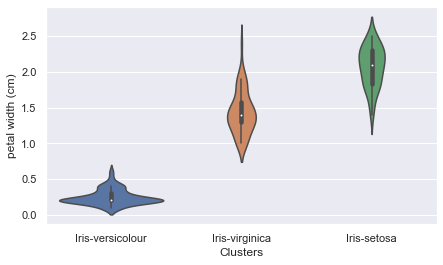

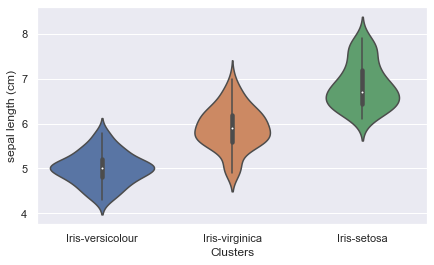

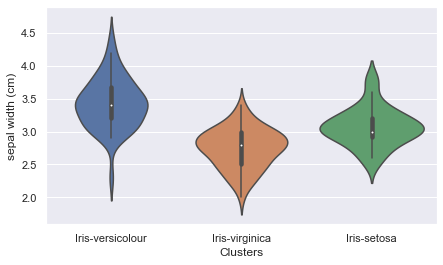

In [17]:
sns.set(rc={'figure.figsize':(7,4)})

sns.violinplot(x = 'Clusters', y = 'petal length (cm)', data = data_with_clusters)
plt.show()
sns.violinplot(x = 'Clusters', y = 'petal width (cm)', data = data_with_clusters)
plt.show()
sns.violinplot(x = 'Clusters', y = 'sepal length (cm)', data = data_with_clusters)
plt.show()
sns.violinplot(x = 'Clusters', y = 'sepal width (cm)', data = data_with_clusters)
plt.show()


# Pair Plot

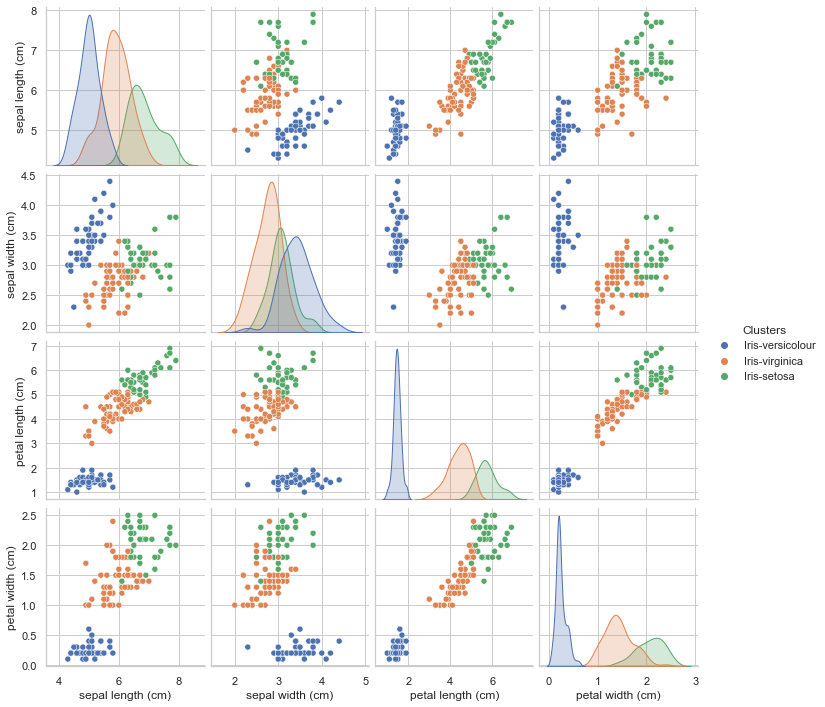

In [18]:
sns.set_style('whitegrid')
sns.pairplot(data_with_clusters, hue ='Clusters');

# Pair Plot Insights

1. There is seems positve correlation between petal-length and petal-width(seems linear relationship).
2. Iris-setosa seems to have smaller petal length and petal width as compared to others.
3. Iris-setosa seems to also have smaller sepal length and sepal width as compared to others.
4. It seems like petal- length and petal-width are right-skewed.